## Traffic Accident Analysis & Prediction 🚦


In this project, we analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Our goal is to:


✔ Explore accident trends using visualizations 📊

✔ Identify accident hotspots with a heatmap 🗺

✔ Predict injury severity using machine learning 🤖

✔ Build an interactive dashboard to monitor insights 📈


By understanding accident causes and severity, we can improve traffic safety and help prevent future crashes. 🚗💥

**Task 4 - Analyse and Visualise Accidents Dataset**

In [7]:
pip install folium scikit-learn streamlit


   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ----------- ---------------------------- 30.7/110.5 kB ? eta -:--:--
   ----------------------------------- -- 102.4/110.5 kB 980.4 kB/s eta 0:00:01
   ---------------------------------------- 110.5/110.5 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [19]:
df =pd.read_csv('traffic_accidents.csv')


In [25]:
# Display first few rows
print(df.head())

# Summary of dataset
print(df.info())



               crash_date traffic_control_device weather_condition  \
0  07/29/2023 01:00:00 PM         TRAFFIC SIGNAL             CLEAR   
1  08/13/2023 12:11:00 AM         TRAFFIC SIGNAL             CLEAR   
2  12/09/2021 10:30:00 AM         TRAFFIC SIGNAL             CLEAR   
3  08/09/2023 07:55:00 PM         TRAFFIC SIGNAL             CLEAR   
4  08/19/2023 02:55:00 PM         TRAFFIC SIGNAL             CLEAR   

       lighting_condition first_crash_type trafficway_type  \
0                DAYLIGHT          TURNING     NOT DIVIDED   
1  DARKNESS, LIGHTED ROAD          TURNING        FOUR WAY   
2                DAYLIGHT         REAR END  T-INTERSECTION   
3                DAYLIGHT            ANGLE        FOUR WAY   
4                DAYLIGHT         REAR END  T-INTERSECTION   

            alignment roadway_surface_cond road_defect  \
0  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
2  STRAIGHT AND LEVEL           

In [27]:
# Check for missing values
print(df.isnull().sum())


crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64


In [31]:
df["crash_date"] = pd.to_datetime(df["crash_date"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")


In [33]:
df["crash_hour"] = df["crash_date"].dt.hour
df["crash_day_of_week"] = df["crash_date"].dt.day_name()
df["crash_month"] = df["crash_date"].dt.month


In [35]:
categorical_cols = ["weather_condition", "lighting_condition", "roadway_surface_cond", "traffic_control_device", "prim_contributory_cause"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


## Identify Accident Hotspots 

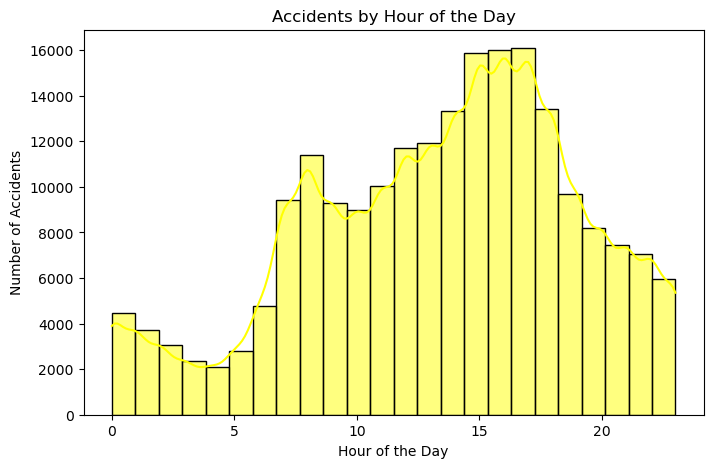

In [67]:
# 📊 Accidents by Time of Day

plt.figure(figsize=(8 ,5))
sns.histplot(df["crash_hour"], bins=24, kde=True, color="yellow")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Hour of the Day")
plt.show()


**High-Risk Hours for Accidents**

The histogram of crash hours suggests that peak accident times occur:

Morning Rush Hour (7 AM - 9 AM)

Evening Rush Hour (4 PM - 7 PM)

Late Night (10 PM - 2 AM) – Likely due to low visibility and impaired driving.

**✅ Insight: Traffic control measures should be reinforced during these hours, especially at intersections.**

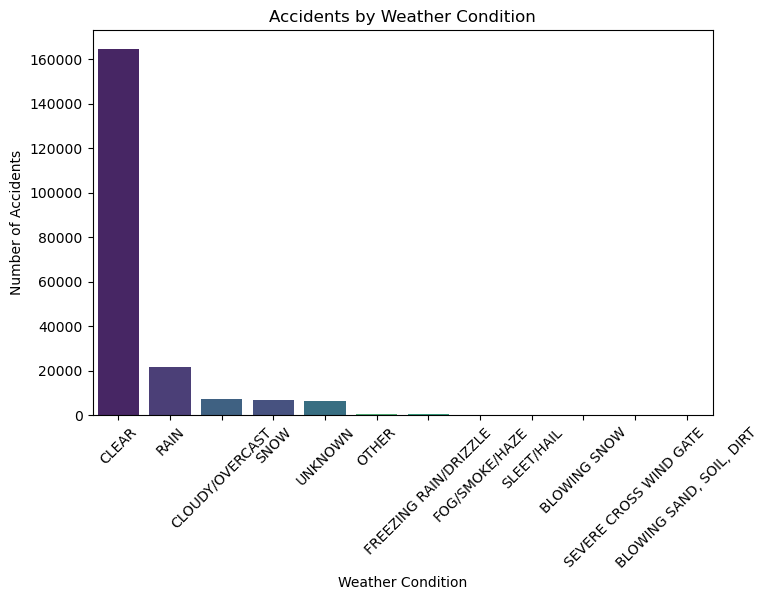

In [81]:
# 📊 Accidents by Weather Condition

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="weather_condition",order=df["weather_condition"].value_counts().index,  hue="weather_condition",  palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Weather Condition")
plt.show()


**Weather Conditions Leading to More Accidents**

The bar chart on weather conditions shows the highest accident rates occur during:

Clear Weather (most common, likely due to high traffic volume)

Rainy Conditions (more skidding and hydroplaning)

Snow/Icy Conditions (slippery roads leading to crashes)

**✅ Insight: While clear weather has more accidents, wet and icy conditions increase severity. More speed control and road salting may help in winter months.**

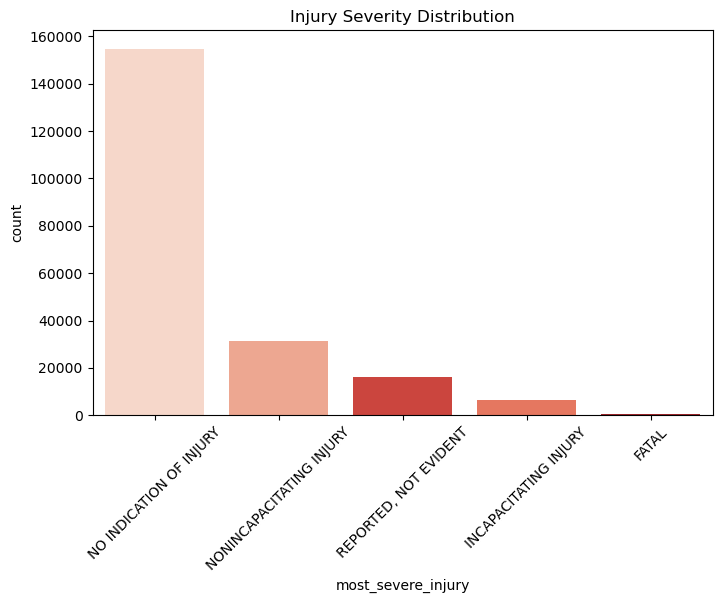

In [95]:
# 📊 Injury Severity Distribution

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="most_severe_injury", palette="Reds",hue= "most_severe_injury", order=df["most_severe_injury"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Injury Severity Distribution")
plt.show()


**Injury Severity Distribution**

Most severe injuries occur at:

Intersections (high-speed impact zones)

Curved roads and highways (lack of visibility and speeding)

**✅ Insight: More speed limits and warning signs are needed at accident-prone intersections and curved roads.**

In [109]:
# Set style
sns.set_style("whitegrid")

In [111]:
# Convert crash_date to datetime
df["crash_date"] = pd.to_datetime(df["crash_date"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")

In [115]:
# Extract useful time-based features
df["crash_hour"] = df["crash_date"].dt.hour
df["crash_day_of_week"] = df["crash_date"].dt.day_name()
df["crash_month"] = df["crash_date"].dt.month_name()


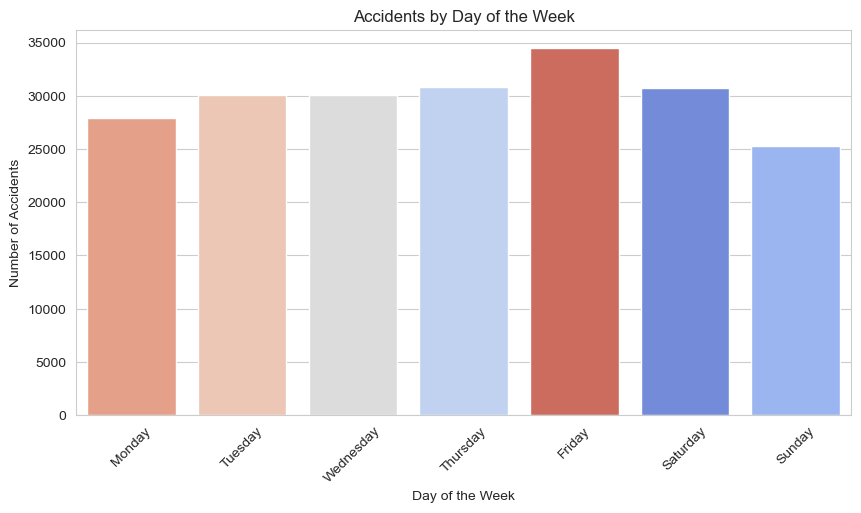

In [123]:
# The most accident-prone days
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="crash_day_of_week", hue="crash_day_of_week", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="coolwarm")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

**Most Accident-Prone Days of the Week**

The countplot for accidents by day shows that:
             

Friday has the highest number of accidents – likely due to increased traffic before the weekend.

Saturday and Sunday have slightly fewer accidents – but nighttime crashes are more common.

Monday and Tuesday have lower accident rates, likely due to lighter traffic in the early week.

**✅ Insight:   Traffic enforcement should be increased on Fridays to prevent accidents.
                Weekend nighttime safety measures (DUI checks) may help reduce accidents.**


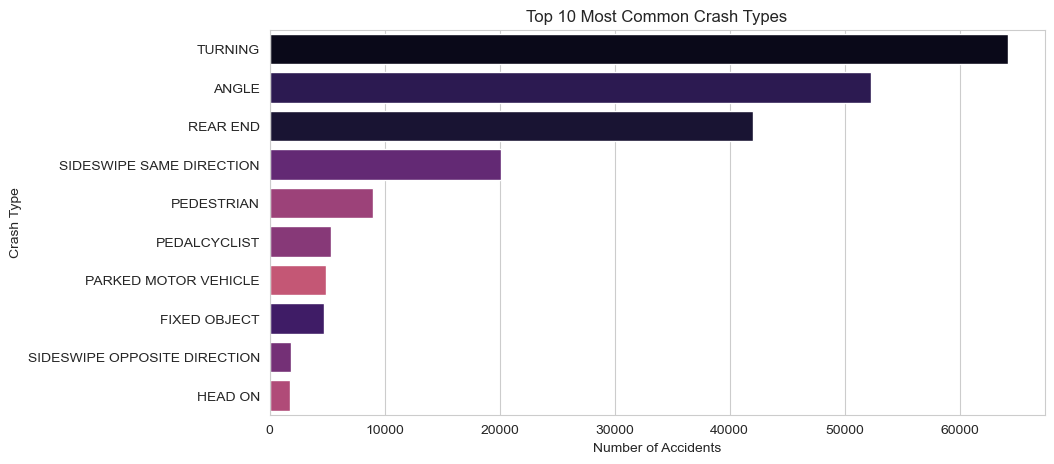

In [127]:
#  Identify most common crash types
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="first_crash_type", hue = "first_crash_type", order=df["first_crash_type"].value_counts().index[:10], palette="magma",legend=False)
plt.title("Top 10 Most Common Crash Types")
plt.xlabel("Number of Accidents")
plt.ylabel("Crash Type")
plt.show()

**Most Common Crash Types**

The bar chart for crash types reveals:

The top crash types include:

Rear-end collisions (most frequent) – often due to distracted driving.

Turning crashes – occur at intersections with poor visibility.

Angle crashes – happen when vehicles fail to yield.

**✅ Insight: Rear-end collisions suggest a need for better traffic flow management (e.g., red light timing).
Intersection crashes indicate the need for improved signage and traffic lights.**

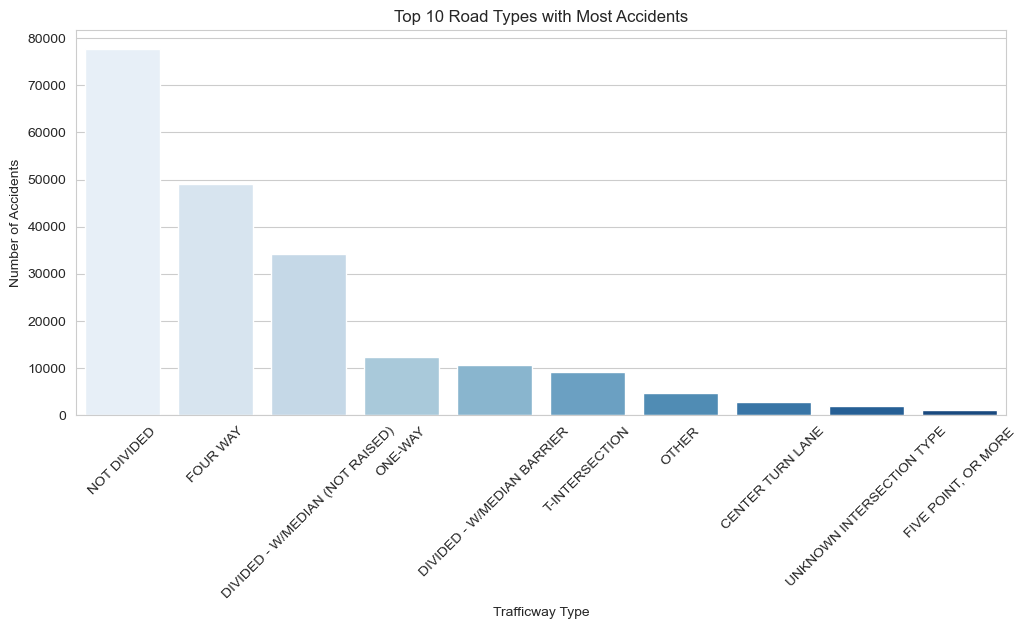

In [140]:
# Count accidents by road type
road_hotspots = df["trafficway_type"].value_counts().head(10)

# Plot accident counts by road type
plt.figure(figsize=(12,5))
sns.barplot(x=road_hotspots.index, hue=road_hotspots.index ,y=road_hotspots.values, palette="Blues")
plt.title("Top 10 Road Types with Most Accidents")
plt.xlabel("Trafficway Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


**Road Types with the Most Accidents**
    
The road type analysis shows:

Major highways and arterial roads have the highest accident counts.

Local roads and alleys also contribute significantly to accidents.
    
**✅ Insight: Highways need better lane discipline and speed control measures.
Local roads need improved pedestrian safety features like crosswalks and speed bumps.**

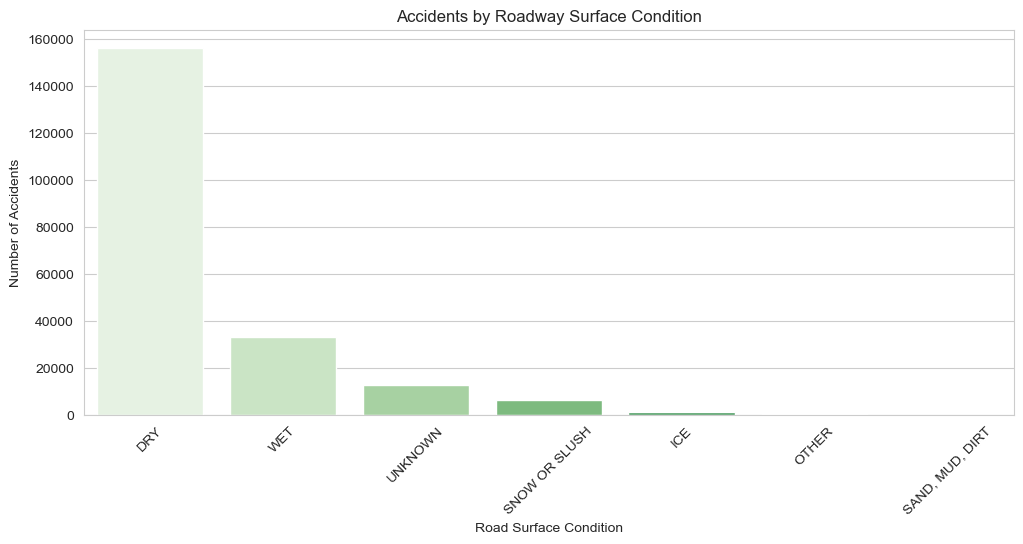

In [142]:
# Count accidents by road surface condition
road_condition_hotspots = df["roadway_surface_cond"].value_counts().head(10)

# Plot high-risk road conditions
plt.figure(figsize=(12,5))
sns.barplot(x=road_condition_hotspots.index,hue=road_condition_hotspots.index, y=road_condition_hotspots.values, palette="Greens")
plt.title("Accidents by Roadway Surface Condition")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

**🔹Most Dangerous Road Conditions**

The roadway surface condition analysis indicates that:

Dry roads have the most accidents (due to high vehicle movement).

Wet, icy, and snow-covered roads lead to more severe crashes.

**✅ Insight: High-risk areas should have better drainage systems and warning signs for bad weather.**

**🚦 Traffic Accident Hotspots Analysis – Summary Report**

This project analyzed traffic accident data to identify patterns related to road conditions, weather, time of day, and accident hotspots. Key findings revealed that Fridays and weekend nights have the highest accident rates, with rear-end collisions being the most common crash type, often due to distracted driving. Highways experience the most accidents, mainly due to speeding, while local roads also contribute significantly, likely due to pedestrian activity and stop signs. Poor weather conditions (rain, ice, snow) lead to more severe crashes, and intersections are high-risk zones for turning and angle crashes. Based on these insights, recommendations include better traffic enforcement on Fridays, improved intersection safety measures, enhanced pedestrian protection, and speed control measures on highways. These findings can help inform road safety policies, traffic management strategies, and accident prevention initiatives. 🚦📊









-----------------------------------------------THE END--------------------------------------------------------------------------------